# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Plink - PCA

In [2]:
%%bash 
plink \
  --vcf /Users/cmdb/qbb2020-answers/week3/lab_hw/BYxRM_segs_saccer3.bam.simplified.vcf \
  --pca \
  --allow-extra-chr \
  --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf /Users/cmdb/qbb2020-answers/week3/lab_hw/BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%

In [3]:
%%bash
head plink.eigenvec

A01 01 0.0353455 0.0121191 0.0203633 0.0369758 -0.00371816 0.0383015 0.0280454 -0.00718582 0.0552279 4.30173e-05 -0.00998784 -0.00984027 -0.000946717 0.0163578 0.0189659 0.0449926 0.0187722 0.0251466 -0.0387737 0.0142384
A01 02 -0.0203733 -0.0115301 -0.00871792 -0.0703994 -0.0506287 0.0450617 -0.0699031 -0.0143431 0.0238492 0.0270039 0.0141224 0.00332691 -0.0039757 -0.0208873 -0.0326634 -0.0172422 0.0159907 -0.00790786 0.00872536 0.0139886
A01 03 -0.0172656 -0.00806361 -0.0522656 -0.0388474 -0.0382605 0.0282452 0.0462828 0.008466 0.00314205 -0.0309712 0.0150524 -0.00243935 -0.0487502 0.0479302 -0.0321832 0.00460651 -0.016738 0.00343947 -0.0637942 -0.0349545
A01 04 0.0207922 -0.0744735 -0.00745026 0.00797909 0.013607 0.02267 -0.0246187 0.0353385 -0.032396 -0.0188403 0.000669337 -0.00559284 0.00685793 0.0256263 0.0122854 0.0577782 0.021666 -0.0418856 0.0019378 -0.0437749
A01 05 -0.0319175 0.0685914 0.0250888 -0.00833838 0.0164201 0.0101749 0.0096589 -0.0512051 -0.0323806 0.030435 -0.0067

# Create DataFrame

In [4]:
df_pca = pd.read_csv("plink.eigenvec", sep = "\s+", header=None)
df_pca.columns =["Family_ID","Sample_ID", "PCA1", "PCA2", "PCA3","PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", 
                        "PCA10", "PCA11", "PCA12", "PCA13", "PCA14", "PCA15", "PCA16", "PCA17", "PCA18", "PCA19", "PCA20"]
df_pca

,Family_ID,Sample_ID,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,...,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


# Plot

Text(0, 0.5, 'PCA2')

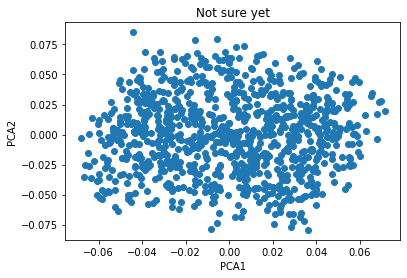

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=df_pca['PCA1'], y = df_pca['PCA2'])
plt.title("Variation in ")
plt.xlabel("PCA1")
plt.ylabel("PCA2")